In [144]:
import scipy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import erfinv

### Task 1

In [2]:
# background parameters
XMIN = 0.
XMAX = 20.
intercept = 20.
slope = -1.
# signal parameters
mean = 10.
sigma = 0.5
# chose number of bins that is appropriate for the size of the statistics sample
NBINS = 100

#create a linear class: the background
class Linear:
    #initialises the class: takes intercept, slope, Xmax, Xmin 
    def __init__(self, intercept, slope, XMIN, XMAX):
            self.intercept = intercept
            self.slope = slope
            self.lolimit = XMIN
            self.hilimit = XMAX
            self.maxval = XMAX
            #initialises an empty mass array to be appended
            self.mass = []

    # Evaluate method (un-normalised) generates the line
    def evaluate(self , t):
        #mx + c
        return self.intercept + self.slope * t
    def next(self):
        doLoop = True
        while(doLoop ):
        # start with uniform random number in [min , max)
            x = np.random.uniform(self.lolimit , self.hilimit)
            #get y1 values from a*x + b
            y1 = self.evaluate(x)
            #get y2 values from a uniform distribution
            y2 = np.random.uniform(0, self.maxval)
            #box method that selects x values when uniform distribution values (y2) is less than the linear distribution (y1)
            if (y2 < y1):
                filtered_x = x
                self.mass.append(filtered_x)
                return filtered_x
    
    
#creating a Gauss class: the signal
class Gauss:
    #takes in arguments of the mean and standard deviation of the signal
    def __init__(self, mean, sigma):
        #initialises an empty mass array to be appended
        self.mass = []
        self.mean = mean
        self.sigma = sigma
        
    def next1(self):
        doLoop = True
        while(doLoop ):
            #generates normal distribution
            x = np.random.normal(self.mean, self.sigma)
            filtered_x = x
            self.mass.append(filtered_x)
            return filtered_x
    
    def integral(self):
        #mu is the number of values
        mu = 10000
        sigma = np.sqrt(mu)
        #gaussian equation
        gauss = lambda x: 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(x-mu)**2/sigma**2)
        #integration of 0 to mu plus ten sigma, i.e. up to a really high number (not infinity as this throws up errors)
        #this is used to normalise the distribution
        int1,err1 = integrate.quad(gauss, 0, mu+10*sigma)
        #integration of values beyond the data given up to infinity
        int2,err2= integrate.quad(gauss, 10300, np.inf)
        return int1,int2
    
    def integral2(self):
        #λ = 5,000 and k ≥5,000 + 300 = 5,300
        #new mu is now 5000 (50% of the values)
        mu = 5000
        sigma = np.sqrt(mu)
        #gaussian equation
        gauss = lambda x: 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(x-mu)**2/sigma**2)
        #integration of 0 to mu plus ten sigma, i.e. up to a really high number (not infinity as this throws up errors)
        #this is used to normalise the distribution
        int1,err1 = integrate.quad(gauss, 0, mu+10*sigma)
        #integration of values beyond the data (5300) given up to infinity
        int2,err2= integrate.quad(gauss, 5300, np.inf)
        return int1,int2

In [3]:
#create class with both signal and background distributions
class SignalWithBackground:
    
    def __init__(self, mean , sigma , sig_fraction , intercept , slope , XMIN , XMAX):
        #initializing input values
        self.mean = mean
        self.sigma = sigma
        #include a signal fraction needed to determine the gaussian peak
        self.sig_fraction = sig_fraction
        self.intercept = intercept
        self.slope = slope
        self.min = XMIN
        self.max = XMAX
        self.maxval = XMAX
        #initialise empty lists for mass (all data), mass_sig (signal data) and mass_bgd (background data)
        self.mass = []
        self.mass_sig = []
        self.mass_bgd = []
        #generate the background from the Linear class
        self.background = Linear(self.intercept, self.slope, self.min, self.max)
        #generate the signal from the Gauss class
        self.signal = Gauss(self.mean, self.sigma)
        
        
    def next(self):
        #q is a uniform distribution of numbers from 0 to 1
        q = np.random.uniform ()
        if( q < self.sig_fraction ):
            # if q is less than the signal fraction, we take x from the signal distribution
            filtered_x = self.signal.next1()
            self.mass_sig.append(filtered_x)
        else:
            # if q is greater than the signal fraction, we will take x from the background distribuion
            filtered_x = self.background.next()
            self.mass_bgd.append(filtered_x)
        self.mass.append(filtered_x)
        return filtered_x

In [145]:
# Main code to generate and plot a single experiment
def singleToy(nevents_sig = 300, nevents_bgd = 10000):
    #signal fraction is signal events over the total number of events
    sig_fraction = nevents_sig /( nevents_bgd + nevents_sig)
    #Create the probability distribution function
    pdf = SignalWithBackground(mean , sigma , sig_fraction , intercept , slope , XMIN , XMAX )
    #loop over total number of events, for each iteration, get x value from total distribution (SignalWithBackground.next())
    for i in range( nevents_sig + nevents_bgd ): pdf.next()
        
    # retrieve the mass values for signal, background and their total
    data = pdf.mass
    sig_data = pdf.mass_sig
    bgd_data = pdf.mass_bgd
    # plot things on same page
    myRange = (XMIN , XMAX)
    fig , axs = plt.subplots (3,1, sharex='col',figsize = (15,15))
    axs [0]. set_title("Signal distribution (" + str(len(sig_data )) + " entries)")
    axs [1]. set_title("Background distribution (" + str(len(bgd_data )) + " entries)")
    axs [2]. set_title("Total distribution (" + str(len(data)) + " entries)")
    axs [2]. set_xlabel('X')
    axs [0]. hist(sig_data , bins=NBINS , range=myRange)
    axs [1]. hist(bgd_data , bins = NBINS)
    axs [2]. hist(data , bins = NBINS)
    fig.tight_layout ()
    plt.savefig('Example1.pdf')

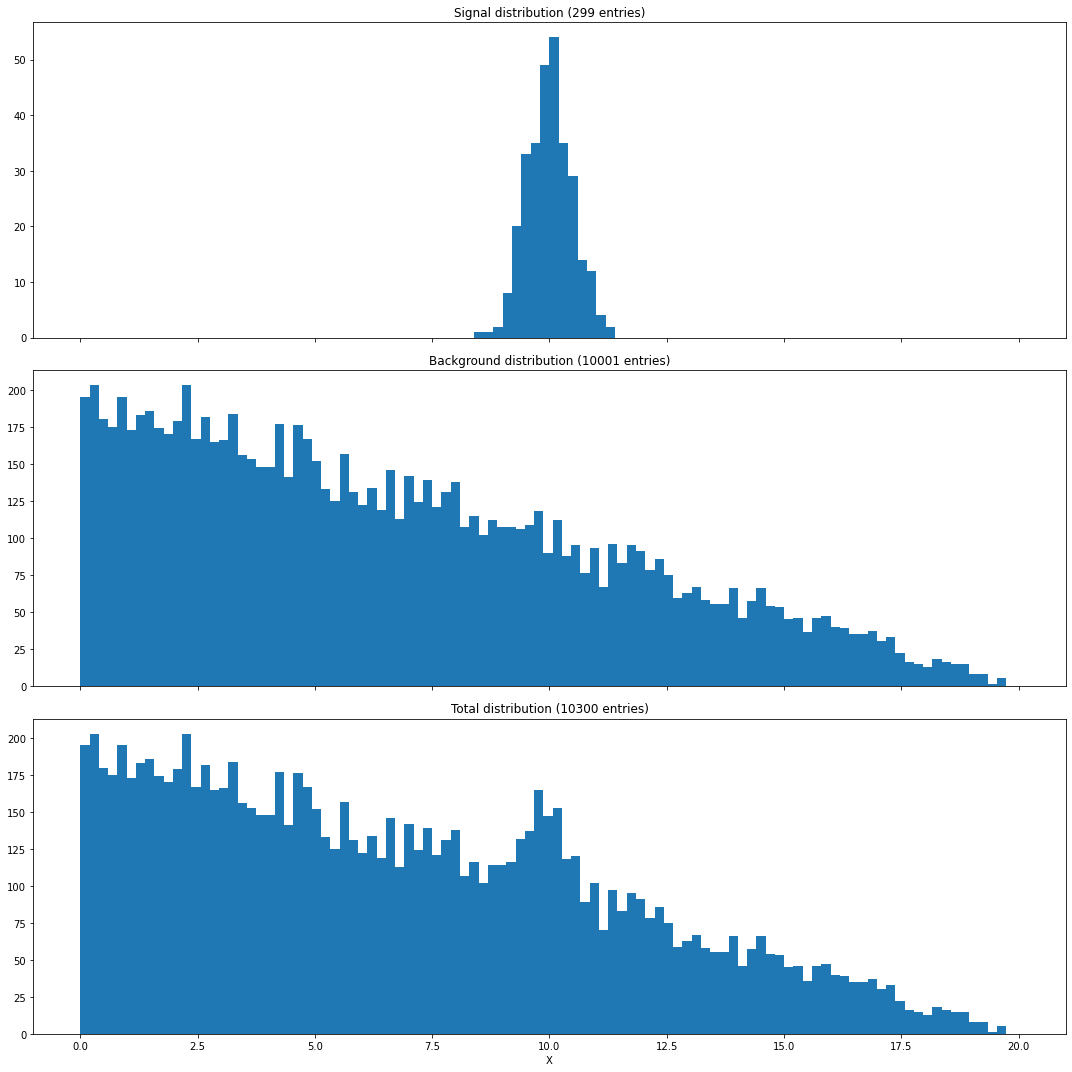

In [146]:
#print out histograms for 300 signal events and 10000 background events
singleToy(nevents_sig = 300, nevents_bgd = 10000)

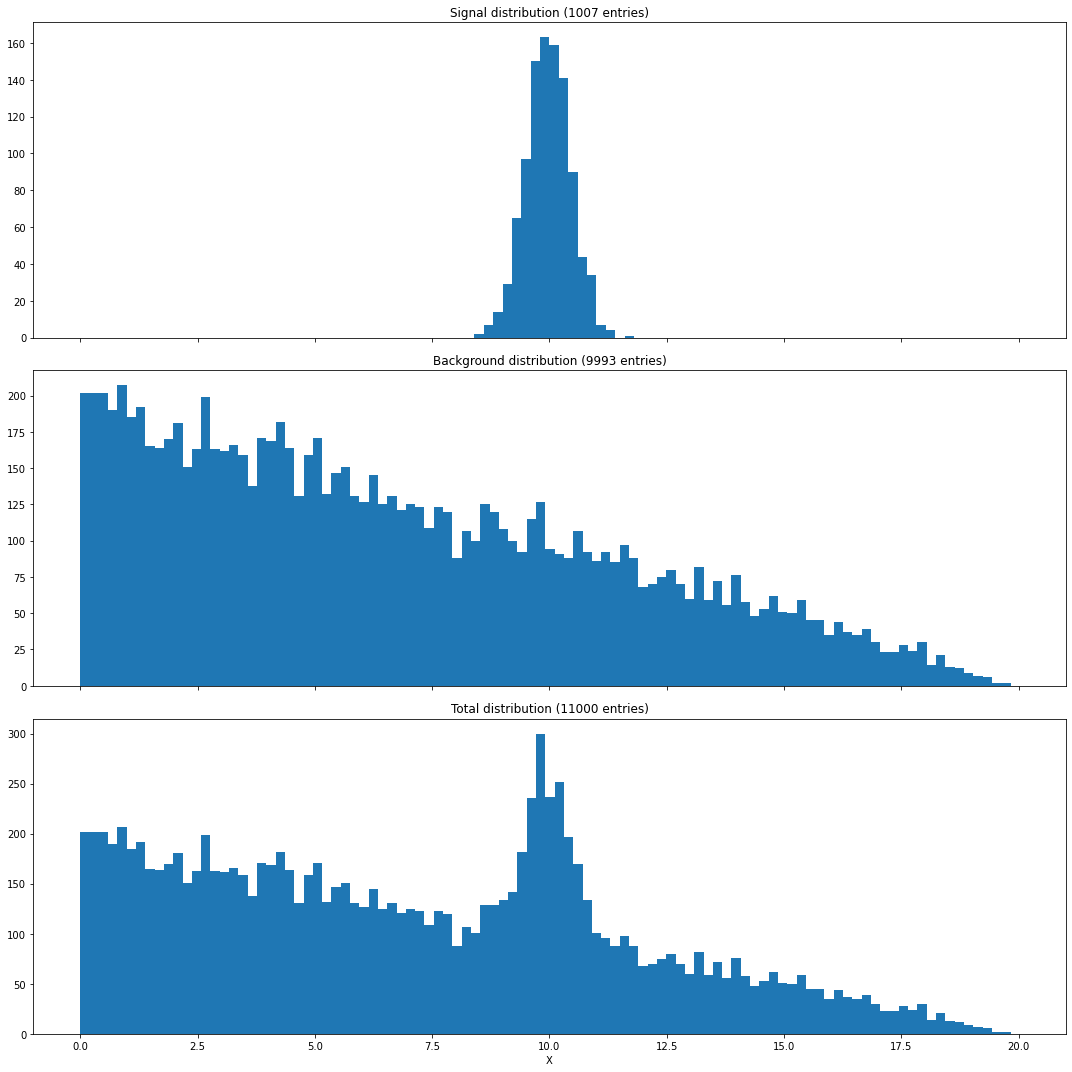

In [5]:
#print out histograms for 1000 signal events and 10000 background events
singleToy(nevents_sig = 1000, nevents_bgd = 10000)

### Task 2

'Calculate the probability that a background-only process with λ = 10, 000 can fluctuate
to give k ≥ 10, 300. The fastest way to do this is to employ the previously coded Gaussian
class, by adding an integral() method, which can be easily implemented with method
scipy.integrate.quad. You will need to take the ratio of two such integrals.'

to do this, I added an integral() function to my Gauss class:


    ` def integral(self):
        #mu is the number of values
        mu = 10000
        sigma = np.sqrt(mu)
        #gaussian equation
        gauss = lambda x: 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(x-mu)**2/sigma**2)
        #integration of 0 to mu plus ten sigma, i.e. up to a really high number (not infinity as this throws up errors)
        #this is used to normalise the distribution
        int1,err1 = integrate.quad(gauss, 0, mu+10*sigma)
        #integration of values beyond the data given up to infinity
        int2,err2= integrate.quad(gauss, 10300, np.inf)
        return int1,int2`

Here, I generate two integrals, one from 0 to mu+10(sigma), where there are essentially 0 data points. Using infinity did not work and this is a similar approach. This integral is expected to give a probability of 1, as it is the sum of all probabilities over the distribution.

The other integral is the probability that data lies above 10300, we expect this to be a very small probability

In [148]:
I = Gauss(mean, sigma)
total, above = I.integral()

In [149]:
#as expected, the total area under the probability distribution curve is ~1
#and the total probability of outliers above 10300 is small ~0.0013
print(total,above)

0.9999999999999993 0.00134989803199694


In [152]:
#the p value is a measure of the probability that an observed difference could have occurred just by random chance
#the p value is essentially the same as the integral of values greater than 10300 as it is just this normalized by 1
#the low p value means that this signal was very unlikely to be random statistical fluctuation - great statistical significance
pvalue = above/total
pvalue

0.0013498980319969409

In [9]:
#the Z value, also given by the number of sigmas is given by the formula:
n_sigmas = erfinv (1 - pvalue) * np.sqrt (2)

In [10]:
#Z value is 3.2 sigma - this is how much it differentiates from the mean - meaning it is statistically significant and not
#just a part of the background
n_sigmas

3.2051549205206973

### Task 3

First, confirm that the number of (expected) background events in the 5 < x < 15
subregion is 50%.

In [11]:
#editting singleToy function to print values from 5<x<15
def singleToy2(nevents_sig = 300, nevents_bgd = 10000):
    sig_fraction = nevents_sig /( nevents_bgd + nevents_sig)
    #Create the pdf
    pdf = SignalWithBackground(mean , sigma , sig_fraction , intercept , slope , XMIN , XMAX )
    for i in range( nevents_sig + nevents_bgd ): pdf.next()
        
    # retrieve the mass values for signal , background and their sum
    data = pdf.mass
    sig_data = pdf.mass_sig
    bgd_data = pdf.mass_bgd
    #make an array so background data can be indexed
    data1 = np.array(bgd_data)
    #get values greater than 5
    data2 = data1[data1>5]
    #get values greater than 5 and less than 15
    data3 = data2[data2<15]
    
    
    # plot things on same page
    myRange = (XMIN , XMAX)
    fig , axs = plt.subplots (4,1, sharex='col',figsize = (15,15))
    axs [0]. set_title("Signal distribution (" + str(len(sig_data )) + " entries)")
    axs [1]. set_title("Background distribution (" + str(len(bgd_data )) + " entries)")
    axs [2]. set_title("Total distribution (" + str(len(data)) + " entries)")
    axs [3]. set_title("50% background distribution (" + str(len(data3)) + " entries)")
    axs [3]. set_xlabel('X')
    axs [0]. hist(sig_data , bins=NBINS , range=myRange)
    axs [1]. hist(bgd_data , bins = NBINS)
    axs [2]. hist(data , bins = NBINS)
    axs [3]. hist(data3 , bins = NBINS)

    fig.tight_layout ()
    plt.savefig('Example1.pdf')

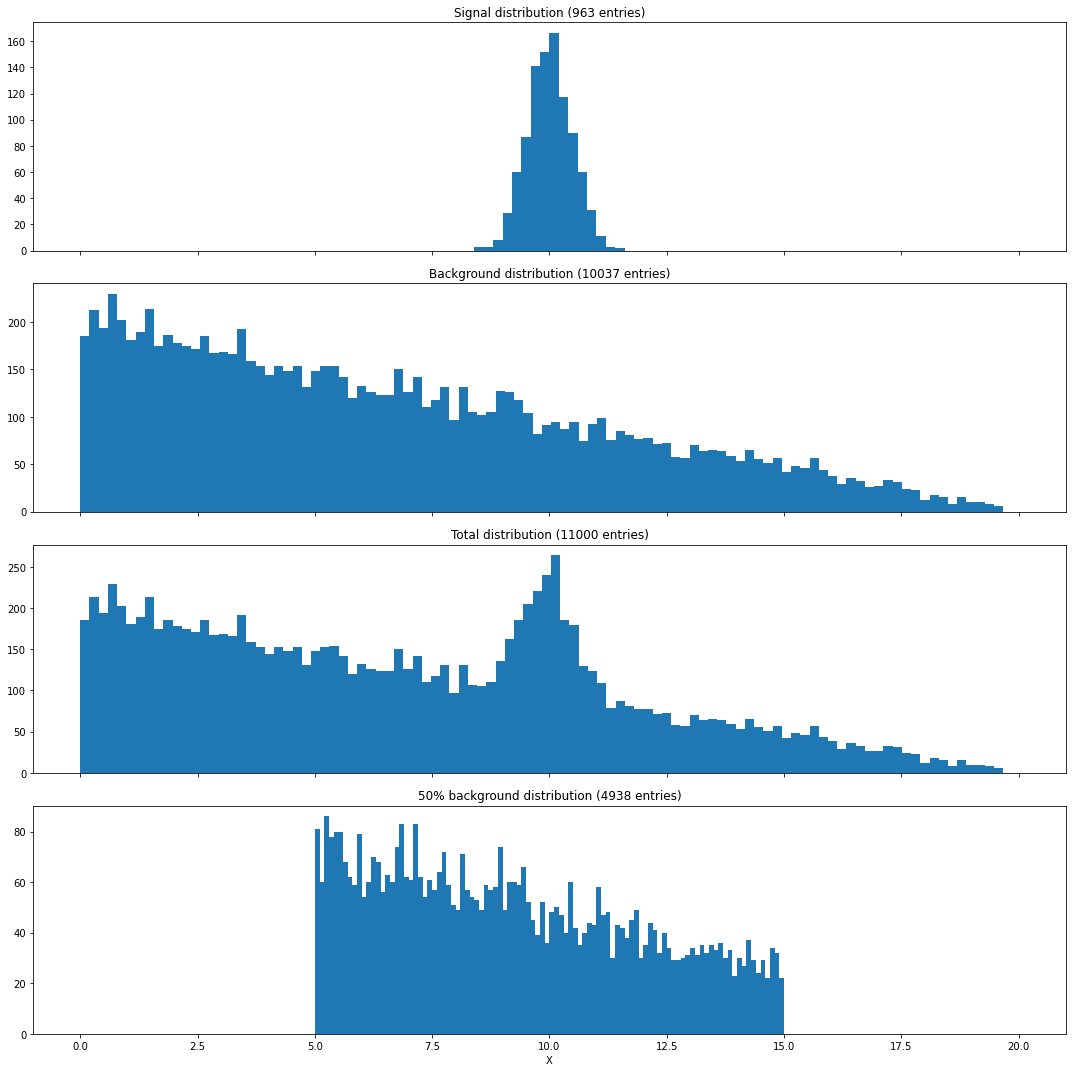

In [12]:
singleToy2(nevents_sig = 1000, nevents_bgd = 10000)

In [13]:
#define new function just to generate background distribution array
def data(nevents_sig = 300, nevents_bgd = 10000):
    sig_fraction = nevents_sig /( nevents_bgd + nevents_sig)
    #Create the pdf
    pdf = SignalWithBackground(mean , sigma , sig_fraction , intercept , slope , XMIN , XMAX )
    for i in range( nevents_sig + nevents_bgd ): pdf.next()
    bgd_data = pdf.mass_bgd
    return bgd_data

In [14]:
bgd_data = data(nevents_sig = 300, nevents_bgd = 10000)

In [15]:
#make an array so background data can be indexed
data1 = np.array(bgd_data)
#get values greater than 5
data2 = data1[data1>5]
#get values greater than 5 and less than 15
data3 = data2[data2<15]
print('amount of data between 5<x<15:',len(data3))

amount of data between 5<x<15: 4945


'Calculate the p-value and the Z-score as in the previous problem
for the updated λ and k values.'

To get the p values and Z scores for the new data, I define a new integral function in the Gauss class, `integral2()`. This does the same as before but integrates the values above 5300 instead of 10300. This gives a small probability, as we expect the signal to lie well within this value.

In [154]:
I = Gauss(mean, sigma)
#get integral function from .integral2() within the Gauss class
total, above = I.integral2()

In [155]:
print(total,above)

1.0000000000000018 1.1045248513590354e-05


In [159]:
#p value is the values above 5300 normalised by total integral (~1)
pvalue = above/total
pvalue

1.1045248513590334e-05

In [157]:
#Z score given by number of sigmas is given as:
n_sigmas = erfinv (1 - pvalue) * np.sqrt (2)
print(n_sigmas)

4.39562892080614


The p value is less and the Z score is greater for this fraction of data. This shows that there is greater statistical significance of the signal in this region compared to the background. Since we know the signal lies within the 5<x<15 region, the deviation is more significant. It is easier to distinguish our signal from the background here as we have reduced the range.

## Task 4

'Find how much better a model including a Gaussian signal (H1) describes the distribution
compared to the background-only linear model (H0)'

In [161]:
# Main code to generate and plot a single experiment
def task4(nevents_sig = None, nevents_bgd = None):
    XMIN = 0.
    XMAX = 20.
    intercept = 20.
    slope = -1.
    sig_fraction = nevents_sig /( nevents_bgd + nevents_sig)
    #Create the pdf
    pdf = SignalWithBackground(mean , sigma , sig_fraction , intercept , slope , XMIN , XMAX )
    for i in range( nevents_sig + nevents_bgd ): pdf.next()
        
    # retrieve the mass values for signal , background and their sum
    data = pdf.mass
    sig_data = pdf.mass_sig
    bgd_data = pdf.mass_bgd
    return data,sig_data,bgd_data

In [162]:
#decrease the population of signal events to 150
data,sig_data,bgd_data = task4(nevents_sig = 150, nevents_bgd = 10000)

In [165]:
## Repeated ##
# background parameters
XMIN = 0.
XMAX = 20.
b = 20.
a = -1.

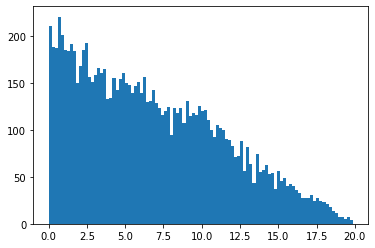

In [164]:
#get number of bins, bin edges and histogram
n,bins,_ = plt.hist(data,bins = 100)
#find centre of bins with a loop
centers = []
for i in range(len(bins)-1):
    centers.append(0.5*(bins[i]+bins[i+1]))

In [130]:
#function that generates the line with given parameters slope and intercept y = ax + b
def linear(centers, a, b):
    return a*centers + b

#function that normalises the linear data
def linear_norm(centers, a, b):
    #integrate returns two values Int, Err so it is indexed at [0]
    norm = integrate.quad(linear, XMIN, XMAX, args=(a,b))[0]
    #return linear function divided by normalization value
    return linear(centers, a, b)/norm
 
#function that generates the signal    
def signal(centers, a, b, frac):
    #using unchanged mu and sigma
    mu = 10
    sigma = 0.5
    #gaussian equation
    gauss = lambda x: 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(x-mu)**2/sigma**2)
    #total signal is the gaussian * some fraction plus the linear background * (1-fraction)
    signal = gauss(centers) * frac + linear_norm(centers,a,b)*(1-frac)
    return signal

#function calculating chi squared fit of linear distribution
def chi_2(params):
    #needs to take in one argument 'params' for minimizer
    a, b = params
    # number of observed events = the number of events from the histogram
    n_obs = n
    #initialize chi squared value
    chi_2 = 0
    #total events = 10000 back ground events + 150 signal events
    n_tot = 10150
    #iterate over x values (centre of histogram bins)
    for i in range(len(centers)):
        #bin width is bin edge minus previous bin edge
        bin_width = bins[i+1]-bins[i]
        #no of predicted events is the probability of background events (x_background value times bin width) * total no. events
        n_pred = linear_norm(centers[i], a, b)*bin_width*n_tot
        #if statement to prevent division by 0 in the log - make ~0 values equal to 0.001
        if n_pred < 1e-3:
            n_pred = 1e-3
        #get the chi squared which is the sum of this equation given in the notes given as:
        chi_2 += 2  * (n_pred - n_obs[i] + n_obs[i]*np.log(n_obs[i]/n_pred))
        #return the chi squared value for the H0 hypothesis (i.e. no signal, just background)
    return chi_2


def chi_2_sig(params):
    #needs to take in one argument 'params' for minimizer - slope, intercept and signal fraction
    a, b, frac = params
    #as above:
    n_obs = n
    chi_2_sig = 0
    n_tot = 10150
    for i in range(len(centers)):
        bin_width = bins[i+1]-bins[i]
        #no of predicted events is the probability of signal events (x_signal value times the bin width) * total no of events
        n_pred = signal(centers[i], a, b, frac)*bin_width*n_tot
        if n_pred < 1e-3:
            n_pred = 1e-3
        #get the chi squared value for the H1 hypothesis (i.e. the signal included)
        chi_2_sig += 2  * (n_pred - n_obs[i] + n_obs[i]*np.log(n_obs[i]/n_pred))
    return chi_2_sig

In [131]:
#chi squared value for the background with given global parameters a = -1, b= 20
chi_2((a, b))

166.9464381163022

In [132]:
frac = 0.015

In [133]:
#chi squared value for the signal with given global parameters a = -1, b= 20, fraction = 0.015
chi_2_sig((a, b, frac))

140.98399981784257

In [135]:
from scipy.stats import chi2

In [140]:
#minimize the linear chi squared function
#powell method works well
#guess a and b to be not exactly the correct answers (otherwise minimizer may get confused at already recieving correct values)
h0 = scipy.optimize.minimize(chi_2,x0=[-0.5,15], method="powell")

In [141]:
#minimize the signal chi squared function
h1 = scipy.optimize.minimize(chi_2_sig,x0=[-0.5,15,0.02], method="powell")

In [142]:
#difference between the chi squared values for H0 and H1 hypotheses
D = h0.fun - h1.fun
#degrees of freedom (extra degree of freedom is the signal fraction in H1)
dof = 1
#get the p value difference
p_val_diff = 1-chi2.cdf(D,dof)
#get the Z score
Z = erfinv (1 - p_val_diff) * np.sqrt (2)

In [143]:
Z

5.111771448631165

The Z score here is around 5 sigma. We are comparing the hypothesis that it is just background versus a specified signal, i.e. that it is not just chance that the fit works. Here 5 sigma suggests that the H1 successfully describes the signal and can be distinguished between H0 which fits the background.